In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_csv("disease_fhsis_totals (1).csv")
df2 = pd.read_csv("location.csv")

<font size = 5><b>Basic Challenges</b></font><br>
- Load the datasets into Pandas DataFrames and display their first 5 rows.

- Check for missing values in both datasets and report which columns have missing data.

- Count the number of unique diseases in the disease_fhsis_totals dataset.


<font size = 5><b>Intermediate Challenges</b></font><br>
- Find the top 5 most reported diseases based on case_total.

- Merge both datasets using adm3_pcode to connect disease data with location data.

- Group the disease data by year (extracting from date) and count the total cases per year.


<font size = 5><b>Advanced Challenges</b></font><br>
- Calculate the death rate for each disease (death_total / case_total), handling division by zero.

- Find the province with the highest number of cases for each disease.

- Find the disease with the highest mortality rate in each region.

- Visualize trends: Plot the number of cases over time for a specific disease (e.g., Dengue).

In [9]:
df1.head()

,uuid,freq,date,source_name,source_filename,adm3_pcode,disease_icd10_code,disease_common_name,case_total,death_total
0,DFHST000000,M,2018-01-01,FHSIS-LGU,FHSIS_Palayan,PH034919000,A90-A91,DENGUE FEVER,NaN,0.0
1,DFHST000001,M,2018-01-01,FHSIS-LGU,FHSIS_Palayan,PH034919000,E08-E14,DIABETES,NaN,0.0
2,DFHST000002,M,2018-01-01,FHSIS-LGU,FHSIS_Palayan,PH034919000,I11,HYPERTENSIVE HEART DISEASE,NaN,0.0
3,DFHST000003,M,2018-01-01,FHSIS-LGU,FHSIS_Palayan,PH034919000,I21-I22,ISCHEMIC HEART DISEASE,NaN,0.0
4,DFHST000004,M,2018-01-01,FHSIS-LGU,FHSIS_Palayan,PH034919000,I63,ISCHEMIC STROKE,NaN,0.0


In [5]:
df2.head()

,Unnamed: 0,adm1_en,adm1_pcode,adm2_en,adm2_pcode,adm3_en,adm3_pcode,adm4_en,adm4_pcode,brgy_total_area
0,0,Region I,PH010000000,Pangasinan,PH015500000,Dagupan City,PH015518000,Lomboy,PH015518016,1.0216
1,1,Region I,PH010000000,Pangasinan,PH015500000,Dagupan City,PH015518000,Tapuac,PH015518031,1.0440
2,2,Region I,PH010000000,Pangasinan,PH015500000,Dagupan City,PH015518000,Pantal,PH015518022,3.2625
3,3,Region I,PH010000000,Pangasinan,PH015500000,Dagupan City,PH015518000,Barangay I (T. Bugallon),PH015518024,0.1814
4,4,Region III,PH030000000,Nueva Ecija,PH034900000,Palayan City,PH034919000,Imelda Valley,PH034919017,6.3369


In [16]:
# Check for missing values in both datasets and report which columns have missing data.

df1.isnull().sum()

uuid                      0
freq                      0
date                      0
source_name               0
source_filename           0
adm3_pcode                0
disease_icd10_code        0
disease_common_name       0
case_total             1152
death_total             960
dtype: int64

In [18]:
df2.isnull().sum()

Unnamed: 0         0
adm1_en            0
adm1_pcode         0
adm2_en            0
adm2_pcode         0
adm3_en            0
adm3_pcode         0
adm4_en            0
adm4_pcode         0
brgy_total_area    0
dtype: int64

In [20]:
# Count the number of unique diseases in the disease_fhsis_totals dataset.
df1.disease_common_name.nunique()

12

In [32]:
df1.duplicated().sum()

0

In [30]:
df2.duplicated().sum()

0

In [112]:
# Find the top 5 most reported diseases based on case_total.
news = df1.dropna(subset = ["case_total"])
news.groupby(["disease_common_name"])["case_total"].sum().sort_values(ascending = False).head(5)

disease_common_name
DIABETES                      7964.0
ASTHMA                        7058.0
HYPERTENSIVE HEART DISEASE    5834.0
DENGUE FEVER                  2147.0
ISCHEMIC HEART DISEASE          67.0
Name: case_total, dtype: float64

In [106]:
# Merge both datasets using adm3_pcode to connect disease data with location data.
# deleting unecessary columns in location and saving to a variable eto lang need ko eh
checking = df2.drop(columns = ["Unnamed: 0", "adm1_en","adm1_pcode","adm2_en","adm2_pcode","adm4_en","adm4_pcode","brgy_total_area"])
checking


,adm3_en,adm3_pcode
0,Dagupan City,PH015518000
1,Dagupan City,PH015518000
2,Dagupan City,PH015518000
3,Dagupan City,PH015518000
4,Palayan City,PH034919000
...,...,...
874,City of Mandaluyong,PH137401000
875,City of Mandaluyong,PH137401000
876,City of Navotas,PH137503000
877,City of Navotas,PH137503000


In [224]:
# Merge both datasets using adm3_pcode to connect disease data with location data.
merge_dataframes = df1.merge(checking, on = ["adm3_pcode"], suffixes = ('_left','_right'))
merge_dataframes

,uuid,freq,date,source_name,source_filename,adm3_pcode,disease_icd10_code,disease_common_name,case_total,death_total,adm3_en
0,DFHST000000,M,2018-01-01,FHSIS-LGU,FHSIS_Palayan,PH034919000,A90-A91,DENGUE FEVER,NaN,0.0,Palayan City
1,DFHST000000,M,2018-01-01,FHSIS-LGU,FHSIS_Palayan,PH034919000,A90-A91,DENGUE FEVER,NaN,0.0,Palayan City
2,DFHST000000,M,2018-01-01,FHSIS-LGU,FHSIS_Palayan,PH034919000,A90-A91,DENGUE FEVER,NaN,0.0,Palayan City
3,DFHST000000,M,2018-01-01,FHSIS-LGU,FHSIS_Palayan,PH034919000,A90-A91,DENGUE FEVER,NaN,0.0,Palayan City
4,DFHST000000,M,2018-01-01,FHSIS-LGU,FHSIS_Palayan,PH034919000,A90-A91,DENGUE FEVER,NaN,0.0,Palayan City
...,...,...,...,...,...,...,...,...,...,...,...
87259,DFHST00083F,M,2021-11-22,FHSIS-LGU,FHSIS_Muntinlupa_5_OCR,PH137603000,J45,ASTHMA,NaN,0.0,City of Muntinlupa
87260,DFHST00083F,M,2021-11-22,FHSIS-LGU,FHSIS_Muntinlupa_5_OCR,PH137603000,J45,ASTHMA,NaN,0.0,City of Muntinlupa
87261,DFHST00083F,M,2021-11-22,FHSIS-LGU,FHSIS_Muntinlupa_5_OCR,PH137603000,J45,ASTHMA,NaN,0.0,City of Muntinlupa
87262,DFHST00083F,M,2021-11-22,FHSIS-LGU,FHSIS_Muntinlupa_5_OCR,PH137603000,J45,ASTHMA,NaN,0.0,City of Muntinlupa


In [226]:
# check if may missing pa before mag group by
merge_dataframes.isnull().sum()

uuid                       0
freq                       0
date                       0
source_name                0
source_filename            0
adm3_pcode                 0
disease_icd10_code         0
disease_common_name        0
case_total             15708
death_total            71556
adm3_en                    0
dtype: int64

In [114]:
merge_dataframes.groupby(["adm3_en"])["case_total"].sum()

adm3_en
Cagayan de Oro City    203680.0
City of Muntinlupa          0.0
City of Navotas        166306.0
Palayan City                0.0
Tacloban City          940194.0
Zamboanga City         187759.0
Name: case_total, dtype: float64

In [268]:
# Group the disease data by year (extracting from date) and count the total cases per year.
merge_dataframes["Year"] = merge_dataframes["date"].str.split("-").str[0]
merge_dataframes.head()

merge_dataframes.groupby(["Year"])["case_total"].sum()



Year
2013         0.0
2014         0.0
2015         0.0
2016         0.0
2017    266994.0
2018    321018.0
2019    231426.0
2020    112746.0
2021    299953.0
2022    264522.0
2023      1280.0
Name: case_total, dtype: float64

In [220]:
# Calculate the death rate for each disease (death_total / case_total), handling division by zero.
clone = merge_dataframes
death_report = clone.groupby(["disease_common_name"])[["case_total","death_total"]].sum()
death_report

death_report["death_rate"] = death_report["death_total"] / death_report["case_total"]

death_report.replace([np.inf,-np.inf],0,inplace = True)
death_report.fillna(0,inplace = True)
death_report

,case_total,death_total,death_rate
disease_common_name,,,
ACUTE BLOODY DIARRHEA,480.0,0.0,0.000000
ANGINA,182.0,0.0,0.000000
ASTHMA,187465.0,2031.0,0.010834
CHOLERA,42.0,0.0,0.000000
DENGUE FEVER,163702.0,33.0,0.000202
DIABETES,349477.0,1729.0,0.004947
HYPERTENSIVE HEART DISEASE,795409.0,5285.0,0.006644
ISCHEMIC HEART DISEASE,938.0,44245.0,47.169510
ISCHEMIC STROKE,0.0,5649.0,0.000000


,uuid,freq,date,source_name,source_filename,adm3_pcode,disease_icd10_code,disease_common_name,case_total,death_total,adm3_en
0,DFHST000000,M,2018-01-01,FHSIS-LGU,FHSIS_Palayan,PH034919000,A90-A91,DENGUE FEVER,NaN,0.0,Palayan City
1,DFHST000000,M,2018-01-01,FHSIS-LGU,FHSIS_Palayan,PH034919000,A90-A91,DENGUE FEVER,NaN,0.0,Palayan City
2,DFHST000000,M,2018-01-01,FHSIS-LGU,FHSIS_Palayan,PH034919000,A90-A91,DENGUE FEVER,NaN,0.0,Palayan City
3,DFHST000000,M,2018-01-01,FHSIS-LGU,FHSIS_Palayan,PH034919000,A90-A91,DENGUE FEVER,NaN,0.0,Palayan City
4,DFHST000000,M,2018-01-01,FHSIS-LGU,FHSIS_Palayan,PH034919000,A90-A91,DENGUE FEVER,NaN,0.0,Palayan City
...,...,...,...,...,...,...,...,...,...,...,...
87259,DFHST00083F,M,2021-11-22,FHSIS-LGU,FHSIS_Muntinlupa_5_OCR,PH137603000,J45,ASTHMA,NaN,0.0,City of Muntinlupa
87260,DFHST00083F,M,2021-11-22,FHSIS-LGU,FHSIS_Muntinlupa_5_OCR,PH137603000,J45,ASTHMA,NaN,0.0,City of Muntinlupa
87261,DFHST00083F,M,2021-11-22,FHSIS-LGU,FHSIS_Muntinlupa_5_OCR,PH137603000,J45,ASTHMA,NaN,0.0,City of Muntinlupa
87262,DFHST00083F,M,2021-11-22,FHSIS-LGU,FHSIS_Muntinlupa_5_OCR,PH137603000,J45,ASTHMA,NaN,0.0,City of Muntinlupa


In [232]:
# Find the province with the highest number of cases for each disease.
merge_dataframes.groupby(["adm3_en","disease_common_name"])["case_total"].sum().sort_values(ascending = False)

adm3_en              disease_common_name       
Tacloban City        HYPERTENSIVE HEART DISEASE    793638.0
Cagayan de Oro City  DENGUE FEVER                  161360.0
Tacloban City        DIABETES                      146556.0
Zamboanga City       ASTHMA                         94031.0
                     DIABETES                       92213.0
City of Navotas      ASTHMA                         84154.0
                     DIABETES                       78148.0
Cagayan de Oro City  DIABETES                       32560.0
                     ASTHMA                          9280.0
City of Navotas      DENGUE FEVER                    1736.0
                     HYPERTENSIVE HEART DISEASE      1064.0
                     ISCHEMIC HEART DISEASE           938.0
Zamboanga City       HYPERTENSIVE HEART DISEASE       707.0
                     DENGUE FEVER                     606.0
Cagayan de Oro City  ACUTE BLOODY DIARRHEA            480.0
Zamboanga City       LEPTOSPIROSIS                  

In [262]:
# Find the disease with the highest mortality rate in each region.

moratality = merge_dataframes.groupby(["disease_common_name"])[["case_total","death_total"]].sum()
moratality["mortality_rate"] = moratality["death_total"] / moratality["case_total"]
moratality.replace([np.inf,-np.inf],100,inplace = True)
moratality["mortality_rate"].fillna(0,inplace =True)
moratality.sort_values(by = ["mortality_rate"], ascending = False,inplace =True)


C:\Users\kurt\AppData\Local\Temp\ipykernel_932\1742984856.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  moratality["mortality_rate"].fillna(0,inplace =True)


In [264]:
moratality.head(10)

,case_total,death_total,mortality_rate
disease_common_name,,,
ISCHEMIC STROKE,0.0,5649.0,100.000000
ISCHEMIC HEART DISEASE,938.0,44245.0,47.169510
LEPTOSPIROSIS,216.0,42.0,0.194444
ASTHMA,187465.0,2031.0,0.010834
HYPERTENSIVE HEART DISEASE,795409.0,5285.0,0.006644
DIABETES,349477.0,1729.0,0.004947
DENGUE FEVER,163702.0,33.0,0.000202
ACUTE BLOODY DIARRHEA,480.0,0.0,0.000000
ANGINA,182.0,0.0,0.000000


In [298]:
clones = merge_dataframes.copy()
clones.dropna(subset = ["case_total"],inplace = True)
clones.reset_index(drop = True, inplace = True)
pivot_cases = clones.pivot_table(index = "disease_common_name", columns = "Year", values = "case_total", fill_value = 0)

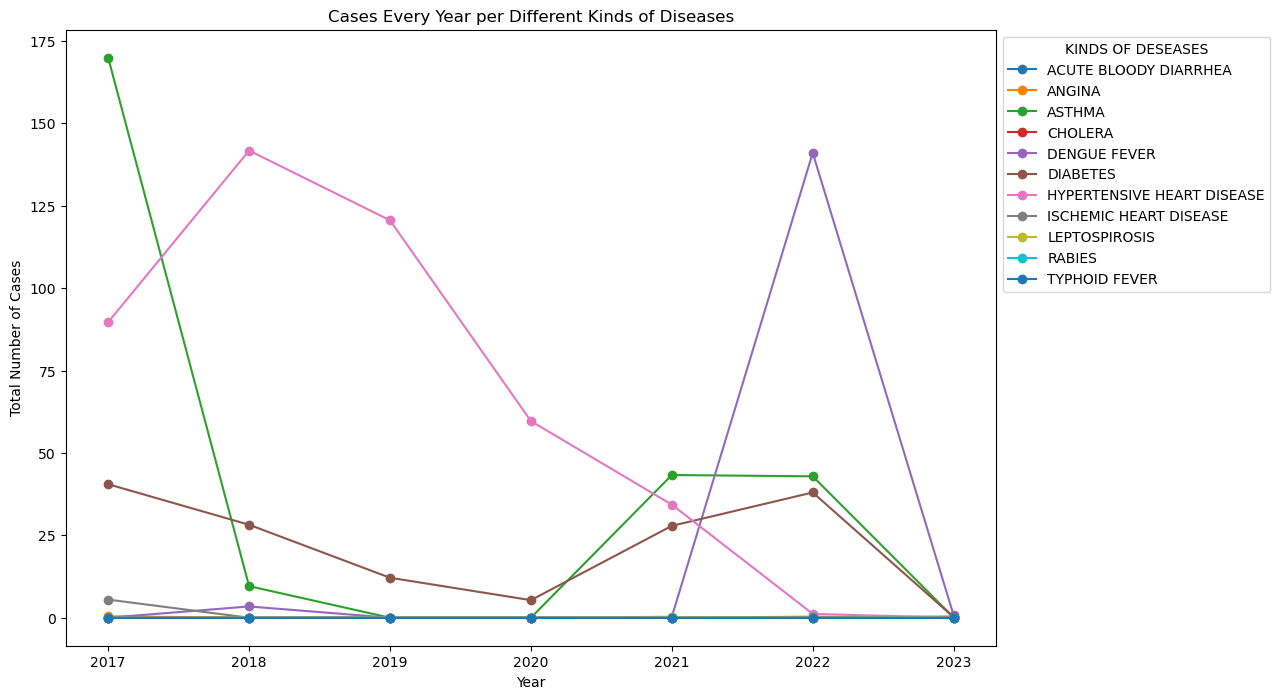

In [360]:

pivot_cases.T.plot(figsize = (12,8),marker = 'o', linestyle = "-")

plt.title("Cases Every Year per Different Kinds of Diseases")
plt.xlabel("Year")
plt.ylabel("Total Number of Cases")
plt.legend(loc = "upper left",bbox_to_anchor=(1,1), title = "KINDS OF DESEASES")
plt.show()

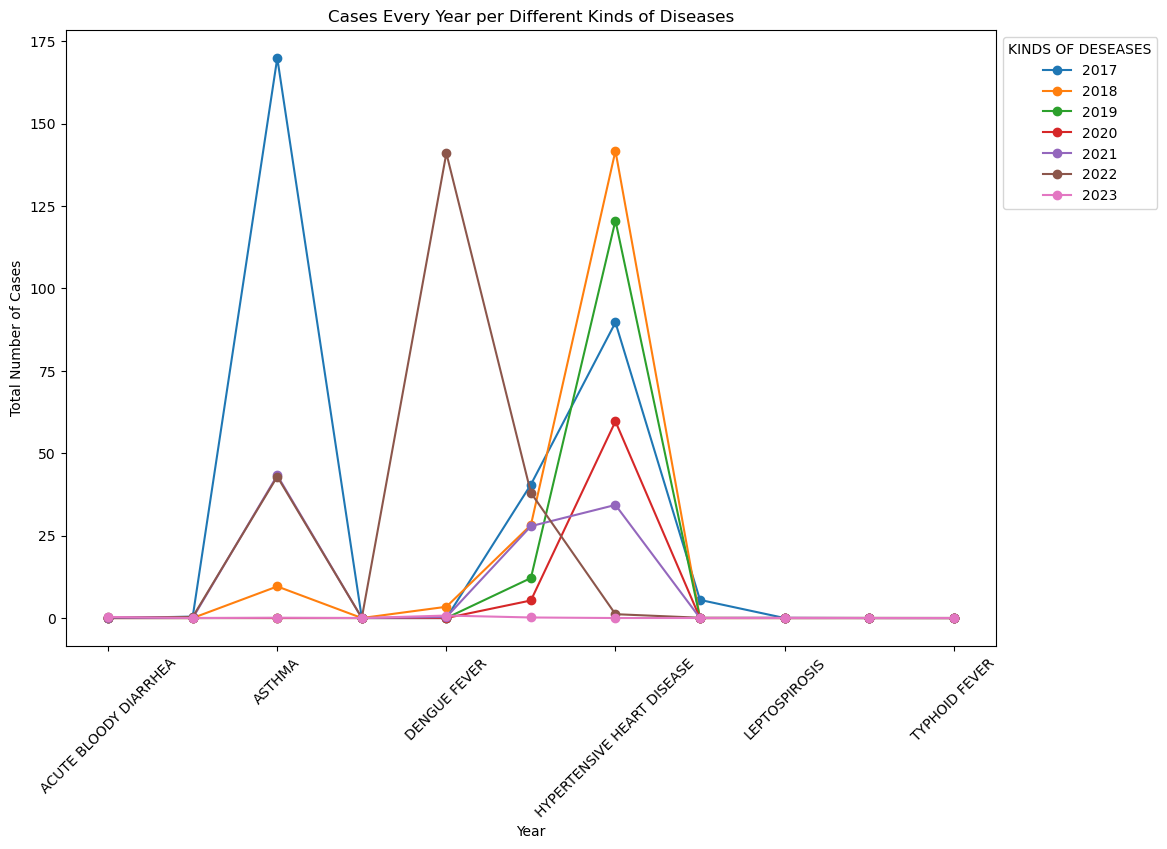

In [366]:
pivot_cases.plot(figsize = (12,8),marker = 'o', linestyle = "-")

plt.title("Cases Every Year per Different Kinds of Diseases")
plt.xlabel("Year")
plt.ylabel("Total Number of Cases")
plt.legend(loc = "upper left",bbox_to_anchor=(1,1), title = "KINDS OF DESEASES")
plt.xticks(rotation = 45)
plt.show()